In [1]:
import os
import numpy as np
import math
import scipy.constants as const
import matplotlib.pyplot as plt
import csv
import matplotlib as mpl
import matplotlib.animation as anim
from matplotlib.animation import writers

# Change matplotlib backend
%matplotlib notebook

In [2]:
# Reading input files.
file1 = open('/Users/bshumberger/Documents/test_space/automation_test_space/MD_scripts/Combined.txt','r')

cmpd = []
GFE = []
VibFreq = []
RotStr = []

for line in file1.readlines():
    col = line.split()
    cmpd.append(int(col[0]))
    GFE.append(float(col[1]))
    VibFreq.append(float(col[2]))
    RotStr.append(float(col[3]))

file1.close()

file2 = open('/Users/bshumberger/Documents/test_space/automation_test_space/MD_scripts/Combined_Free_Energy.txt','r')

cmpd2 = []
GFE2 = []
                
for line in file2.readlines():
    col = line.split()
    cmpd2.append(int(col[0]))
    GFE2.append(float(col[1]))

file2.close()

In [3]:
def diff_mol_ext_coeff_func(snapshots, freq, rotstr):
    
    # Multiplying the rotational strength for simple averaging.
    Avg_RotStr = np.zeros((len(freq)))
    for i in range(0,len(freq)):
        Avg_RotStr[i] += rotstr[i]*1/snapshots
        
    # Calculating the differential molar extinction coefficient.
    for i in range(0,len(Incident_VibFreq)):
        for j in range(0,len(freq)):
            diff_mol_ext_coeff[i] += (1/((2.296*10**(-39))*math.sqrt(np.pi)*fwhm))*freq[j]*Avg_RotStr[j]*np.exp(-((Incident_VibFreq[i]-freq[j])/fwhm)**2)
        Incident_VibFreq_cm1[i] = Incident_VibFreq[i]*8065.54429

In [4]:
number_of_points = 2000
fwhm = .0005
total_snapshots = len(cmpd2)
print(total_snapshots)

snaps = []
W = []
E = []

cmpd3 = []
GFE3 = []
VibFreq3 = []
RotStr3 = []

# If general cutoffs are used, there will be an even distribution of points in all snapshots.
# 0.61992097 eV is approximately 5000 cm-1 and 0.49593677 eV is approximately 4000 cm-1.
# Maximum realistic frequency for vibrational modes of these molecules. Could be general cutoff or max(VibFreq).
max_freq = 0.49593677
# Minimum realistic frequency for vibrational modes of these molecules. Could be general cutoff or min(VibFreq).
min_freq = 0

# Setting up parameters.
delta = float((max_freq-min_freq)/number_of_points)
Incident_VibFreq = np.arange(min_freq, max_freq, delta)

# Spectrum evolving as number of snapshots.
print("Calculating dynamic spectrum with number of snapshots.")
l=0
for k in range(0,501,25):
    diff_mol_ext_coeff = np.zeros((number_of_points))
    Incident_VibFreq_cm1 = np.zeros((number_of_points))
    snaps.append(k)
    l = len(cmpd3)
    print("Snapshot:", k)
    while l<=len(cmpd)-1 and cmpd[l]<=k:
        # Applying if statement to remove unphysical real frequencies.
        if VibFreq[l]<=max_freq:
            cmpd3.append(cmpd[l])
            GFE3.append(GFE[l])
            VibFreq3.append(VibFreq[l])
            RotStr3.append(RotStr[l])
            l+=1
        else:
            l+=1
    diff_mol_ext_coeff_func(k, VibFreq3, RotStr3)
    W.append(Incident_VibFreq_cm1)
    E.append(diff_mol_ext_coeff)

500
Calculating dynamic spectrum with number of snapshots.
Snapshot: 0
Snapshot: 25
Snapshot: 50
Snapshot: 75
Snapshot: 100
Snapshot: 125
Snapshot: 150
Snapshot: 175
Snapshot: 200
Snapshot: 225
Snapshot: 250
Snapshot: 275
Snapshot: 300
Snapshot: 325
Snapshot: 350
Snapshot: 375
Snapshot: 400
Snapshot: 425
Snapshot: 450
Snapshot: 475
Snapshot: 500


<IPython.core.display.Javascript object>


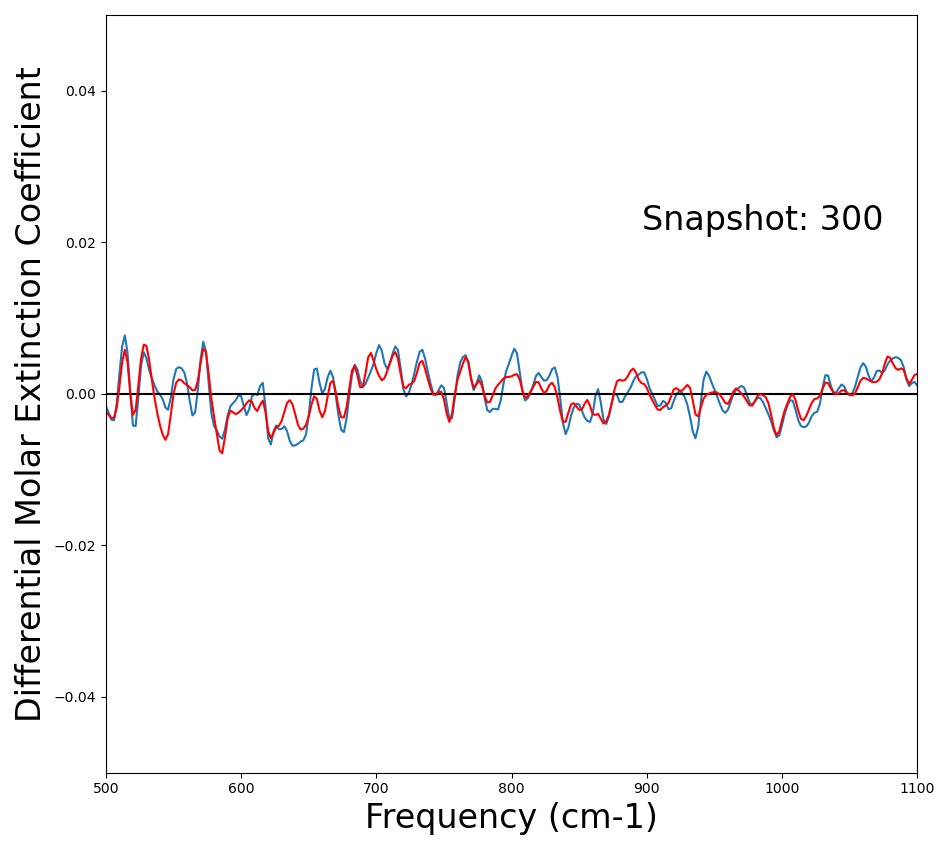

In [18]:
# Converged spectrum.
#diff_mol_ext_coeff = np.zeros((number_of_points))
#Incident_VibFreq_cm1 = np.zeros((number_of_points))
#print("Calculating converged spectrum."  )
#diff_mol_ext_coeff_func(500, VibFreq, RotStr)

# Setting plot parameters
fig = plt.figure(figsize=(9.5, 8.5))
axs = fig.add_subplot(111)
line0, = axs.plot(W[0], E[0],label="VCD")

axs.set_xlim(500,1100)
axs.set_ylim(-0.05,0.05)
axs.set_xlabel('Frequency (cm-1)', fontsize=24)
axs.set_ylabel('Differential Molar Extinction Coefficient', fontsize=24)
axs.axhline(y = 0, color = 'black')
snapshot = axs.text(1075, 0.025, '', ha='right', va='top', fontsize=24)

# Adding converged data to the plot.
axs.plot(Incident_VibFreq_cm1, diff_mol_ext_coeff, color="red", label="Converged")

# Defining animation function to add data for each snapshot.
def animate(i):
    line0.set_xdata(W[i])
    line0.set_ydata(E[i])
    snapshot.set_text('Snapshot: ' + str(int(snaps[i])))
    return line0

# Plotting dynamic spectrum.
ani = anim.FuncAnimation(
    fig, animate, interval=600, frames=21, repeat_delay=800, blit=True, cache_frame_data=False, repeat=True)
plt.tight_layout()

In [19]:
Writer = writers['ffmpeg']
writer = Writer(fps=1.25, metadata={'artist': 'BS'}, bitrate=600)
ani.save('VCD_convergence_animation_2.mp4', writer)

Snapshots: 20
Delta X:  25 Delta Y:  21.762011697234264 Slope:  0.8704804678893706
Delta X:  25 Delta Y:  -4.342396964380743 Slope:  -0.17369587857522972
Delta X:  25 Delta Y:  -3.668658455261159 Slope:  -0.14674633821044636
Delta X:  25 Delta Y:  -0.7527218194930576 Slope:  -0.030108872779722306
Delta X:  25 Delta Y:  -1.2053243111880292 Slope:  -0.048212972447521166
Delta X:  25 Delta Y:  -0.7100682885312146 Slope:  -0.028402731541248585
Delta X:  25 Delta Y:  -0.6986031782264348 Slope:  -0.027944127129057392
Delta X:  25 Delta Y:  -0.16518857067693915 Slope:  -0.006607542827077566
Delta X:  25 Delta Y:  -0.2513689584374692 Slope:  -0.010054758337498769
Delta X:  25 Delta Y:  -0.6969339606885665 Slope:  -0.02787735842754266
Delta X:  25 Delta Y:  -0.10189836308282985 Slope:  -0.004075934523313194
Delta X:  25 Delta Y:  -0.3925897039797466 Slope:  -0.015703588159189864
Delta X:  25 Delta Y:  -0.46335983794142876 Slope:  -0.01853439351765715
Delta X:  25 Delta Y:  -0.40462801758497413 

<IPython.core.display.Javascript object>


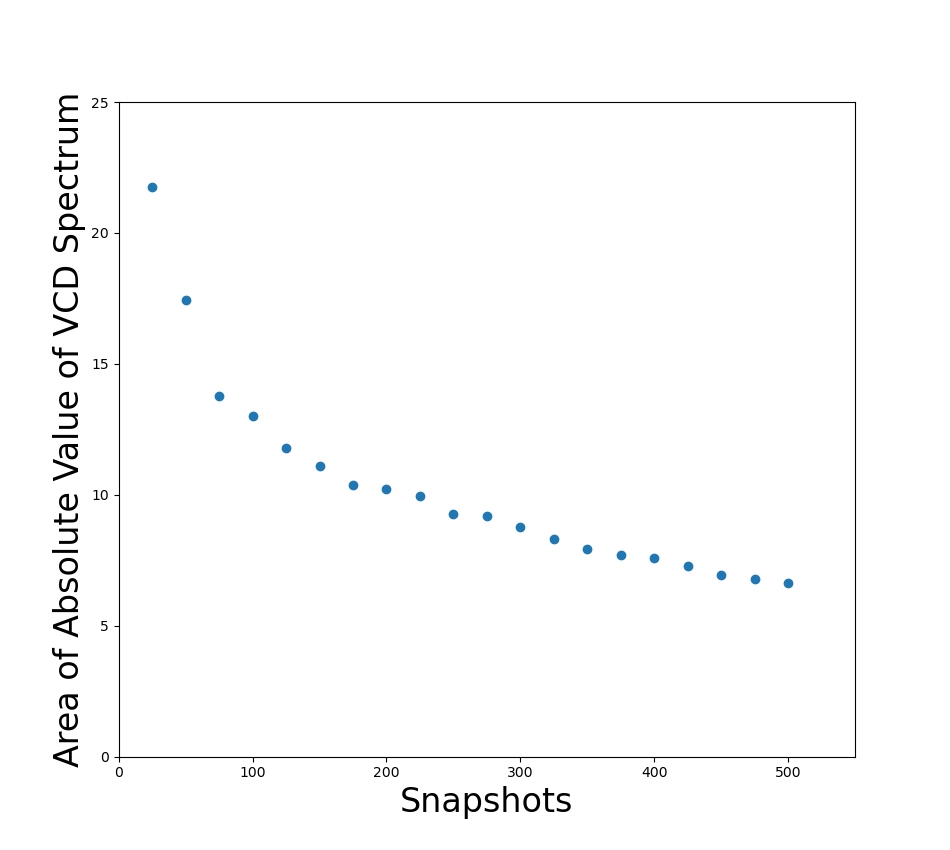

In [20]:
from scipy.integrate import simpson
from numpy import trapz

print("Snapshots:", len(W)-1)
Area = []
for i in range(0,len(W)):
    Abs =[]
    Abs = np.absolute(E[i])
    area = trapz(Abs, x=W[i])
    Area.append(area)

Slope = []
for i in range(1,len(W)):
    delta_x = snaps[i] - snaps[i-1]
    delta_y = Area[i] - Area[i-1]
    slope = delta_y / delta_x
    Slope.append(slope)
    print("Delta X: ", delta_x, "Delta Y: ", delta_y, "Slope: ", slope)

# Setting plot parameters
fig = plt.figure(figsize=(9.5, 8.5))
axs = fig.add_subplot(111)
axs.set_xlim(0, 550)
axs.set_ylim(0, 25)
axs.set_xlabel('Snapshots', fontsize=24)
axs.set_ylabel('Area of Absolute Value of VCD Spectrum', fontsize=24)
plt.scatter(snaps[1:], Area[1:])
plt.savefig('VCD_convergence.pdf')
plt.show(fig)